In [1]:
########### Stock Market Data


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
smarket = pd.read_csv("Smarket.csv")  # Replace with the actual path to the dataset

# Show the features of Stock Market data
print(smarket.columns)

# Show the first 10 rows of the data
print(smarket.head(10))

# Calculate the correlation between features
print(smarket.corr())

# Calculate the correlation between features without the 9th feature
print(smarket.iloc[:, :-1].corr())

# Plot the Volume feature
plt.figure(figsize=(8, 4))
plt.plot(smarket['Volume'])
plt.title('Volume')
plt.show()


Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')
   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up
5  2001  0.213  0.614 -0.623  1.032  0.959  1.3491  1.392        Up
6  2001  1.392  0.213  0.614 -0.623  1.032  1.4450 -0.403      Down
7  2001 -0.403  1.392  0.213  0.614 -0.623  1.4078  0.027        Up
8  2001  0.027 -0.403  1.392  0.213  0.614  1.1640  1.303        Up
9  2001  1.303  0.027 -0.403  1.392  0.213  1.2326  0.287        Up


ValueError: could not convert string to float: 'Up'

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
5      No     Yes   919.588530   7491.558572
6      No      No   825.513331  24905.226578
7      No     Yes   808.667504  17600.451344
8      No      No  1161.057854  37468.529288
9      No      No     0.000000  29275.268293


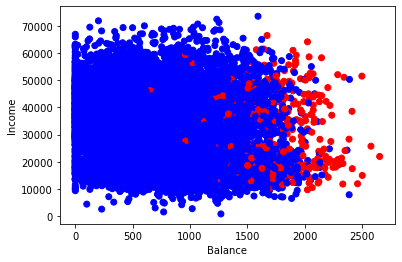

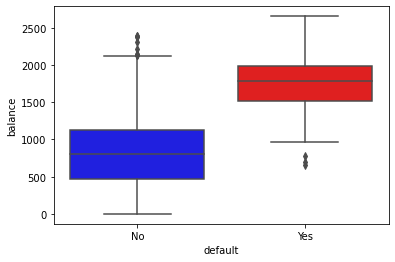

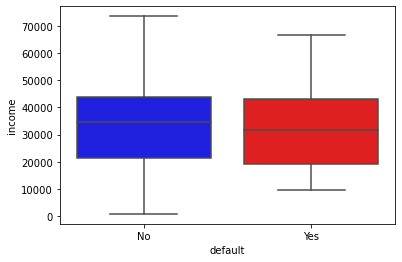

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                  0.4534
Time:                        10:53:52   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

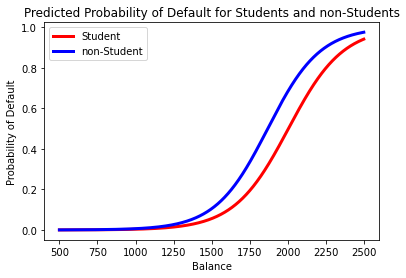

In [7]:
################## Default data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


Default = pd.read_csv('Default.csv')

# Display first 10 rows
print(Default.head(10))

# Plot
Default['pty'] = np.where(Default['default'] == 'Yes', 3, 1)
Default['pcl'] = np.where(Default['default'] == 'Yes', 'red', 'blue')

plt.scatter(Default['balance'], Default['income'], c=Default['pcl'])
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

# BoxPlot
sns.boxplot(x='default', y='balance', data=Default, palette=['blue', 'red'])
plt.show()

sns.boxplot(x='default', y='income', data=Default, palette=['blue', 'red'])
plt.show()


Default['default'] = Default['default'].map({'Yes': 1, 'No': 0})    ## change caterogical variables to numerical variables
# Logistic regression - balance
model1 = smf.logit('default ~ balance', data=Default).fit()
print(model1.summary())

# Logistic regression - student
model2 = smf.logit('default ~ student', data=Default).fit()
print(model2.summary())

# Prediction for model1
xnew1 = pd.DataFrame({'balance': [1000], 'income': [99], 'student': ['yes']})
pred1 = model1.predict(xnew1[['balance']])
print(pred1)

# Prediction for model2
xnew2 = pd.DataFrame({'balance': [1000], 'income': [99], 'student': ['Yes']})
pred2 = model2.predict(xnew2[['student']])
print(pred2)




# Logistic regression - all variables
model3 = smf.logit('default ~ balance + income + student', data=Default).fit()
print(model3.summary())

# Separate models for students and non-students
Default['student'] = Default['student'].map({'Yes': 1, 'No': 0})

DefaultY = Default[Default['student'] == 1]
model4 = smf.logit('default ~ balance', data=DefaultY).fit()
print(model4.summary())

DefaultN = Default[Default['student'] == 0]
model5 = smf.logit('default ~ balance', data=DefaultN).fit()
print(model5.summary())

# Output probability
DefaultT = pd.DataFrame({'balance': np.arange(500, 2501, 1)})
pred4 = model4.predict(DefaultT)
pred5 = model5.predict(DefaultT)

plt.plot(DefaultT['balance'], pred4, label='Student', color='red', linewidth=3)
plt.plot(DefaultT['balance'], pred5, label='non-Student', color='blue', linewidth=3)
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.title('Predicted Probability of Default for Students and non-Students')
plt.legend()
plt.show()




In [9]:
########### Example codes of newton algorith and convergence performance, with good initialization

import numpy as np

# Define the function and its derivative
def f(x):
    return np.exp(x) - x**2 + 3 * np.sin(x)

def f_prime(x):
    return np.exp(x) - 2*x + 3 * np.cos(x)

# Newton-Raphson method
def newton_raphson(x0, tol=1e-10, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        fpx = f_prime(x)
        
        if fpx == 0:
            print("Zero derivative. No solution found.")
            return None
        
        x_new = x - fx / fpx
        
        # Print the current step and value
        print(f"Iteration {i}: x = {x_new}, f(x) = {fx}")
        
        if abs(x_new - x) < tol:
            print(f"Converged to {x_new} after {i+1} iterations.")
            return x_new
        
        x = x_new
    
    print("Exceeded maximum iterations. No solution found.")
    return None

# Initial guess
x0 = 0.5
root = newton_raphson(x0)

Iteration 0: x = -0.3645511885780508, f(x) = 2.836997886512737
Iteration 1: x = -0.24436099364174452, f(x) = -0.5079793242836691
Iteration 2: x = -0.24380717888681455, f(x) = -0.0023164981315213495
Iteration 3: x = -0.24380716087006823, f(x) = -7.535559931604041e-08
Iteration 4: x = -0.24380716087006823, f(x) = 0.0
Converged to -0.24380716087006823 after 5 iterations.


In [1]:
########### Example codes of newton algorith and convergence performance, with bad initialization

import numpy as np

# Define the function and its derivative
def f(x):
    return np.exp(x) - x**2 + 3 * np.sin(x)

def f_prime(x):
    return np.exp(x) - 2*x + 3 * np.cos(x)

# Newton-Raphson method
def newton_raphson(x0, tol=1e-10, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        fpx = f_prime(x)
        
        if fpx == 0:
            print("Zero derivative. No solution found.")
            return None
        
        x_new = x - fx / fpx
        
        # Print the current step and value
        print(f"Iteration {i}: x = {x_new}, f(x) = {fx}")
        
        if abs(x_new - x) < tol:
            print(f"Converged to {x_new} after {i+1} iterations.")
            return x_new
        
        x = x_new
    
    print("Exceeded maximum iterations. No solution found.")
    return None

# Initial guess
x0 = 50
root = newton_raphson(x0)

Iteration 0: x = 49.0, f(x) = 5.184705528587072e+21
Iteration 1: x = 48.0, f(x) = 1.9073465724950998e+21
Iteration 2: x = 47.0, f(x) = 7.016735912097631e+20
Iteration 3: x = 46.0, f(x) = 2.5813128861900675e+20
Iteration 4: x = 45.0, f(x) = 9.496119420602448e+19
Iteration 5: x = 44.0, f(x) = 3.4934271057485095e+19
Iteration 6: x = 43.0, f(x) = 1.2851600114359306e+19
Iteration 7: x = 42.0, f(x) = 4.727839468229344e+18
Iteration 8: x = 41.0, f(x) = 1.7392749415204992e+18
Iteration 9: x = 40.0, f(x) = 6.398434935300532e+17
Iteration 10: x = 39.00000000000001, f(x) = 2.353852668370184e+17
Iteration 11: x = 38.00000000000002, f(x) = 8.659340042399285e+16
Iteration 12: x = 37.000000000000064, f(x) = 3.185593175711299e+16
Iteration 13: x = 36.00000000000018, f(x) = 1.1719142372801988e+16
Iteration 14: x = 35.00000000000046, f(x) = 4311231547114662.0
Iteration 15: x = 34.00000000000119, f(x) = 1586013452312937.0
Iteration 16: x = 33.00000000000304, f(x) = 583461742526992.9
Iteration 17: x = 32.

[[9645   22]
 [ 254   79]]
[[9435  232]
 [ 140  193]]
[[9084  583]
 [  85  248]]


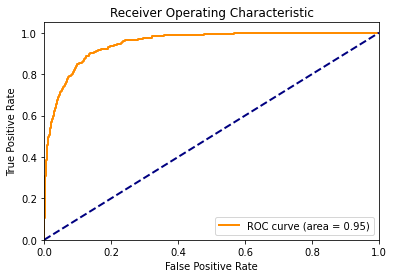

[[955   3]
 [ 35   7]]
AUC: 0.9594144547171687
[[938  20]
 [ 18  24]]
AUC: 0.9594144547171687


In [23]:
########### LDA on Default data
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


Default = pd.read_csv('Default.csv')

# Prepare data
X = Default.drop('default', axis=1)
X['student'] = X['student'].map({'Yes': 1, 'No': 0})
y = (Default['default'] == 'Yes').astype(int)


# LDA on Default data
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda_train = lda.predict(X)
print(confusion_matrix(y, lda_train))

# Change the default probability to 0.2
lda_probs = lda.predict_proba(X)[:, 1]
lda_pred1 = np.where(lda_probs > 0.2, "Yes", "No")
print(confusion_matrix(Default['default'], lda_pred1))

# Change the default probability to 0.1
lda_pred2 = np.where(lda_probs > 0.1, "Yes", "No")
print(confusion_matrix(Default['default'], lda_pred2))

# ROC curve for LDA
fpr, tpr, _ = roc_curve(y, lda_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Test Error of LDA
train_ids, test_ids = train_test_split(range(len(Default)), train_size=0.9, random_state=42)
lda.fit(X.iloc[train_ids], y.iloc[train_ids])
lda_pred = lda.predict(X.iloc[test_ids])
print(confusion_matrix(y.iloc[test_ids], lda_pred))

##########AUC
y_probs = lda.predict_proba(X.iloc[test_ids])[:, 1]
auc_score = roc_auc_score(y.iloc[test_ids], y_probs)
print(f"AUC: {auc_score}")



# Test Error with threshold 0.2
lda_probs_test = lda.predict_proba(X.iloc[test_ids])[:, 1]
pred4 = np.where(lda_probs_test > 0.2, "Yes", "No")
print(confusion_matrix(Default.iloc[test_ids]['default'], pred4))


[[9636   31]
 [ 239   94]]


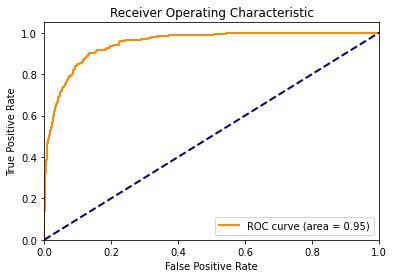

[[955   3]
 [ 33   9]]


In [27]:
############# QDA on default data
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


Default = pd.read_csv('Default.csv')

# Prepare data
X = Default.drop('default', axis=1)
X['student'] = X['student'].map({'Yes': 1, 'No': 0})
y = (Default['default'] == 'Yes').astype(int)

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Predictions
y_pred = qda.predict(X)
y_probs = qda.predict_proba(X)[:, 1]

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

# ROC curve
fpr, tpr, _ = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



############## Test Error
# Test Error of LDA
train_ids, test_ids = train_test_split(range(len(Default)), train_size=0.9, random_state=42)
qda.fit(X.iloc[train_ids], y.iloc[train_ids])
y_pred = qda.predict(X.iloc[test_ids])
conf_matrix = confusion_matrix(y.iloc[test_ids], y_pred)
print(conf_matrix)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: default, dtype: int64


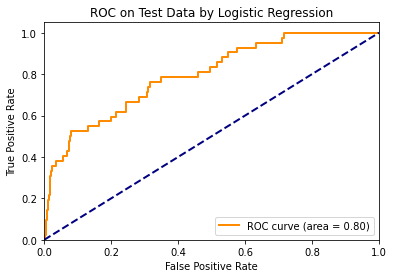

In [32]:
################# AUC and ROC for Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Default = pd.read_csv('Default.csv')
Default['student'] = Default['student'].map({'Yes': 1, 'No': 0})    ## change caterogical variables to numerical variables
Default['default'] = Default['default'].map({'Yes': 1, 'No': 0})    ## change caterogical variables to numerical variables
# Prepare data
X = Default.drop(['default'], axis=1)
y = Default['default']

print(y.head(10))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions
y_probs = log_reg.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Test Data by Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [3]:
import numpy as np  ######## Example of gradient descent algorithm

# Function and its derivative
def f(x):
    return np.exp(x) + x**2 - 4*x

def df(x):
    return np.exp(x) + 2*x - 4

# Gradient descent function
def gradient_descent(starting_point, learning_rate, tolerance, max_iterations):
    x = starting_point
    for i in range(max_iterations):
        gradient = df(x)
        new_x = x - learning_rate * gradient
        print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}, gradient = {gradient}")
        if abs(new_x - x) < tolerance:
            print(f"Convergence reached after {i+1} iterations.")
            break
        x = new_x
    return x

# Parameters
initial_point = 3
learning_rate = 0.3
tolerance = 1e-6
max_iterations = 1000

# Run gradient descent
minimized_x = gradient_descent(initial_point, learning_rate, tolerance, max_iterations)
print(f"The minimum value is approximately at x = {minimized_x}")

Iteration 1: x = 3, f(x) = 17.085536923187668, gradient = 22.085536923187668
Iteration 2: x = -3.6256610769563, f(x) = 27.674694038835167, gradient = -11.224690667858553
Iteration 3: x = -0.25825387659873433, f(x) = 1.8721096843264737, gradient = -3.7441086400442067
Iteration 4: x = 0.8649787154145276, f(x) = -0.33677114804289143, gradient = 0.10491296632410751
Iteration 5: x = 0.8335048255172954, f(x) = -0.3379184837976772, gradient = -0.03161982485452164
Iteration 6: x = 0.8429907729736519, f(x) = -0.3380245740776262, gradient = 0.009286620445569937
Iteration 7: x = 0.8402047868399809, f(x) = -0.3380336767017935, gradient = -0.002749039490725913
Iteration 8: x = 0.8410294986871987, f(x) = -0.33803447560155053, gradient = 0.000811898859600646
Iteration 9: x = 0.8407859290293185, f(x) = -0.33803454525350984, gradient = -0.0002399495312932487
Iteration 10: x = 0.8408579138887065, f(x) = -0.33803455133806226, gradient = 7.090064490888892e-05
Iteration 11: x = 0.8408366436952338, f(x) = -

In [6]:
################## confusion matrix as changing threshold in LDA

########### LDA on Default data
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


Default = pd.read_csv('Default.csv')

# Prepare data
X = Default.drop('default', axis=1)
X['student'] = X['student'].map({'Yes': 1, 'No': 0})
y = (Default['default'] == 'Yes').astype(int)


# LDA on Default data
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda_train = lda.predict(X)



# Change the default probability to 0.1
lda_probs = lda.predict_proba(X)[:, 1]
lda_pred1 = np.where(lda_probs > 0.1, "Yes", "No")
tn, fp, fn, tp=confusion_matrix(Default['default'], lda_pred1).ravel()
sensitivity = tp / (tp + fn)
one_minus_specificity = fp / (tn + fp)
print('when threshold=0.1:')
print(f"      Sensitivity={sensitivity}, 1-Specificity={one_minus_specificity}\n")





# Change the default probability to 0.2
lda_probs = lda.predict_proba(X)[:, 1]
lda_pred1 = np.where(lda_probs > 0.2, "Yes", "No")
tn, fp, fn, tp=confusion_matrix(Default['default'], lda_pred1).ravel()
sensitivity = tp / (tp + fn)
one_minus_specificity = fp / (tn + fp)
print('when threshold=0.2:')
print(f"      Sensitivity={sensitivity}, 1-Specificity={one_minus_specificity}\n")




# Change the default probability to 0.3
lda_probs = lda.predict_proba(X)[:, 1]
lda_pred1 = np.where(lda_probs > 0.3, "Yes", "No")
tn, fp, fn, tp=confusion_matrix(Default['default'], lda_pred1).ravel()
sensitivity = tp / (tp + fn)
one_minus_specificity = fp / (tn + fp)
print('when threshold=0.3:')
print(f"      Sensitivity={sensitivity}, 1-Specificity={one_minus_specificity}\n")




# Change the default probability to 0.4
lda_probs = lda.predict_proba(X)[:, 1]
lda_pred1 = np.where(lda_probs > 0.4, "Yes", "No")
tn, fp, fn, tp=confusion_matrix(Default['default'], lda_pred1).ravel()
sensitivity = tp / (tp + fn)
one_minus_specificity = fp / (tn + fp)
print('when threshold=0.4:')
print(f"      Sensitivity={sensitivity}, 1-Specificity={one_minus_specificity}\n")




when threshold=0.1:
      Sensitivity=0.7447447447447447, 1-Specificity=0.06030826523223337

when threshold=0.2:
      Sensitivity=0.5795795795795796, 1-Specificity=0.023999172442329575

when threshold=0.3:
      Sensitivity=0.45645645645645644, 1-Specificity=0.009930692045101892

when threshold=0.4:
      Sensitivity=0.3303303303303303, 1-Specificity=0.004448122478535223



In [8]:
####### confusion matrix as changing threshold in Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
import numpy as np

Default = pd.read_csv('Default.csv')

# Prepare data
X = Default.drop('default', axis=1)
X['student'] = X['student'].map({'Yes': 1, 'No': 0})
y = (Default['default'] == 'Yes').astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predict probabilities on test data
y_prob = log_reg.predict_proba(X_test)[:, 1]


# Set custom threshold
threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
# Calculate sensitivity and 1-specificity
sensitivity = tp / (tp + fn)
one_minus_specificity = fp / (tn + fp)
print('when threshold=0.4:')
print(f"      Sensitivity={sensitivity}, 1-Specificity={one_minus_specificity}\n")


# Set custom threshold
threshold = 0.5
y_pred_custom = (y_prob >= threshold).astype(int)
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
# Calculate sensitivity and 1-specificity
sensitivity = tp / (tp + fn)
one_minus_specificity = fp / (tn + fp)
print('when threshold=0.5:')
print(f"      Sensitivity={sensitivity}, 1-Specificity={one_minus_specificity}\n")




# Set custom threshold
threshold = 0.6
y_pred_custom = (y_prob >= threshold).astype(int)
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
# Calculate sensitivity and 1-specificity
sensitivity = tp / (tp + fn)
one_minus_specificity = fp / (tn + fp)
print('when threshold=0.6:')
print(f"      Sensitivity={sensitivity}, 1-Specificity={one_minus_specificity}\n")




# Set custom threshold
threshold = 0.7
y_pred_custom = (y_prob >= threshold).astype(int)
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
# Calculate sensitivity and 1-specificity
sensitivity = tp / (tp + fn)
one_minus_specificity = fp / (tn + fp)
print('when threshold=0.7:')
print(f"      Sensitivity={sensitivity}, 1-Specificity={one_minus_specificity}\n")

when threshold=0.4:
      Sensitivity=0.24468085106382978, 1-Specificity=0.012388162422573986

when threshold=0.5:
      Sensitivity=0.20212765957446807, 1-Specificity=0.006882312456985547

when threshold=0.6:
      Sensitivity=0.10638297872340426, 1-Specificity=0.0034411562284927736

when threshold=0.7:
      Sensitivity=0.06382978723404255, 1-Specificity=0.0024088093599449415



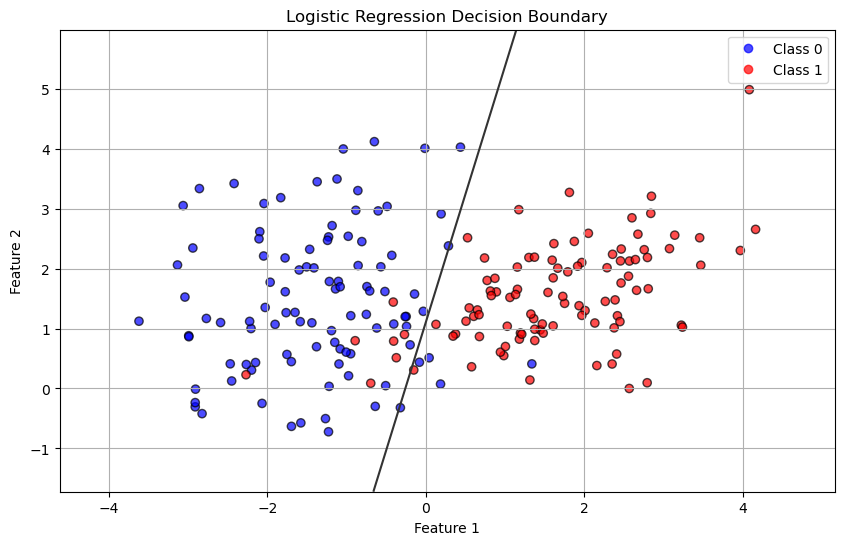

In [6]:
################ visualization of classification boundary of logistic regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_classification(n_samples=200,       # Total number of samples
                           n_features=2,        # Number of features
                           n_redundant=0,       # No redundant features
                           n_informative=2,     # Both features are informative
                           n_clusters_per_class=1,
                           class_sep=1.5,       # Separation between classes
                           random_state=42)     # For reproducibility


# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)


# Define the range for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Flatten the grid to pass into the model for prediction
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict the probability for each point in the grid
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the decision boundary where probability is 0.5
contour = plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=0.6)

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)

# Configurations for the plot
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Create a legend
handles = scatter.legend_elements()[0]
labels = ['Class 0', 'Class 1']
plt.legend(handles, labels)

plt.grid(True)
plt.show()



Maximum iterations reached without convergence.


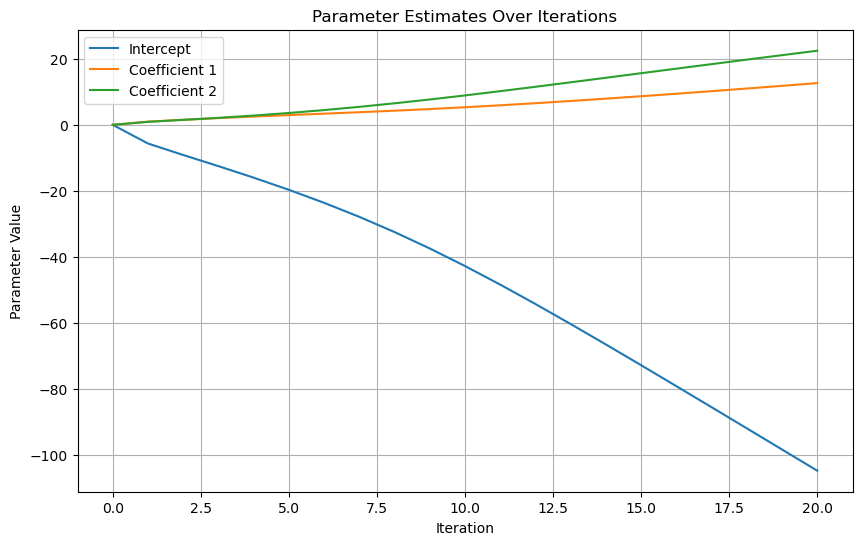

/var/folders/_j/cv87v3fd41g3gd1lbxjsrwc40000gn/T/ipykernel_96864/2290523897.py:158: RuntimeWarning: invalid value encountered in scalar divide
  plt.axvline(-theta[0]/theta[1], label='Decision Boundary', color='green')


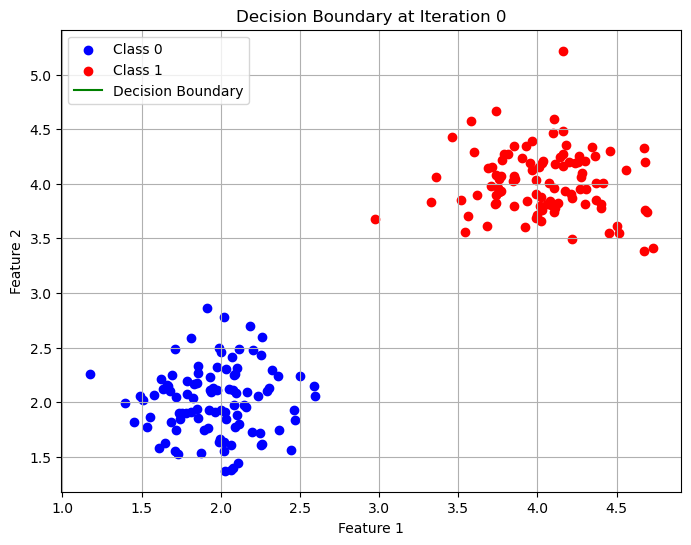

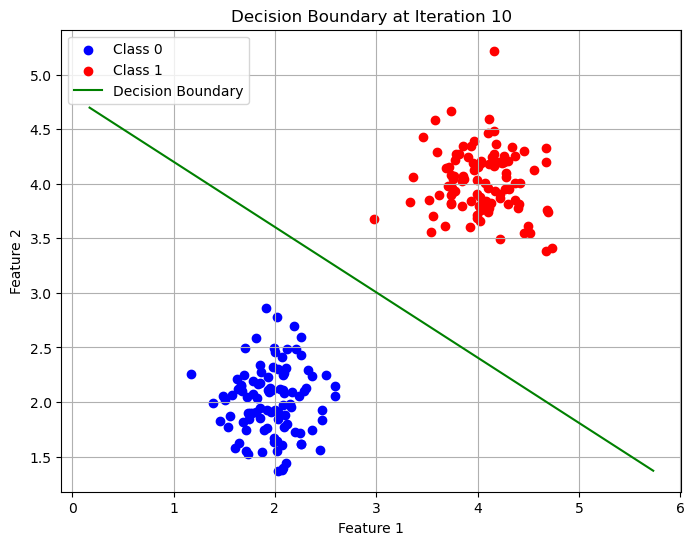

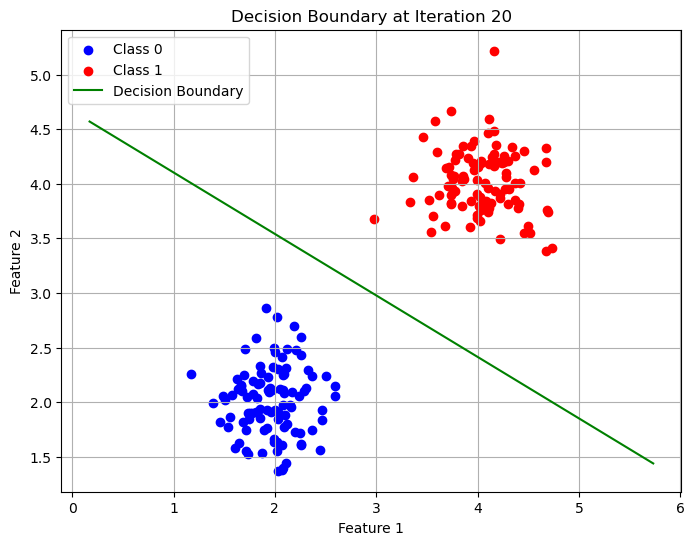

Final parameter estimates (theta): [-104.70796522   12.63715145   22.43869523]
Training Accuracy: 100.00%


In [9]:
########### Non-convergence of newton algoirthm for Logistic regression when data is perfectly separable
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate a Perfectly Separable Two-Dimensional Dataset
def generate_perfectly_separable_data(n_samples=100):
    """
    Generates a perfectly separable two-dimensional dataset.
    
    Parameters:
    - n_samples: Total number of samples (evenly split between two classes)
    
    Returns:
    - X: Feature matrix of shape (n_samples, 2)
    - y: Target vector of shape (n_samples,)
    """
    # Number of samples per class
    n_class = n_samples // 2
    
    # Class 0: Centered at (2, 2)
    mean0 = [2, 2]
    cov0 = [[0.1, 0], [0, 0.1]]  # Small variance
    X0 = np.random.multivariate_normal(mean0, cov0, n_class)
    y0 = np.zeros(n_class)
    
    # Class 1: Centered at (4, 4)
    mean1 = [4, 4]
    cov1 = [[0.1, 0], [0, 0.1]]  # Small variance
    X1 = np.random.multivariate_normal(mean1, cov1, n_class)
    y1 = np.ones(n_class)
    
    # Combine the data
    X = np.vstack((X0, X1))
    y = np.hstack((y0, y1))
    
    return X, y

# Step 2: Define the Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Implement Logistic Regression Using Newton-Raphson Method
class LogisticRegressionNewton:
    def __init__(self, tol=1e-6, max_iter=100):
        """
        Initializes the logistic regression model.
        
        Parameters:
        - tol: Tolerance for the stopping criterion
        - max_iter: Maximum number of iterations
        """
        self.tol = tol
        self.max_iter = max_iter
        self.theta_history = []  # To store parameter estimates
    
    def fit(self, X, y):
        """
        Fits the logistic regression model using the Newton-Raphson method.
        
        Parameters:
        - X: Feature matrix of shape (n_samples, n_features)
        - y: Target vector of shape (n_samples,)
        """
        # Add intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Initialize parameters
        theta = np.zeros(X.shape[1])
        self.theta_history.append(theta.copy())
        
        for iteration in range(self.max_iter):
            z = X @ theta
            h = sigmoid(z)
            
            # Gradient
            gradient = X.T @ (y - h)
            
            # Hessian
            W = np.diag(h * (1 - h))
            Hessian = -X.T @ W @ X
            
            # Check if Hessian is singular
            try:
                delta = np.linalg.inv(Hessian) @ gradient
            except np.linalg.LinAlgError:
                print("Hessian is singular. Stopping iteration.")
                break
            
            # Update parameters
            theta_new = theta - delta
            self.theta_history.append(theta_new.copy())
            
            # Check for convergence
            if np.linalg.norm(theta_new - theta, ord=1) < self.tol:
                print(f"Converged in {iteration + 1} iterations.")
                theta = theta_new
                break
            
            theta = theta_new
        else:
            print("Maximum iterations reached without convergence.")
        
        self.theta = theta
    
    def predict_proba(self, X):
        """
        Predicts probability estimates for input data.
        
        Parameters:
        - X: Feature matrix of shape (n_samples, n_features)
        
        Returns:
        - probabilities: Vector of shape (n_samples,)
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = X @ self.theta
        return sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        """
        Predicts binary class labels for input data.
        
        Parameters:
        - X: Feature matrix of shape (n_samples, n_features)
        - threshold: Decision threshold
        
        Returns:
        - predictions: Vector of shape (n_samples,)
        """
        return (self.predict_proba(X) >= threshold).astype(int)

# Step 4: Visualize Data and Parameter Divergence
def plot_decision_boundary(theta, X, y, title='Decision Boundary'):
    """
    Plots the data points and the decision boundary.
    
    Parameters:
    - theta: Parameter vector of shape (n_features + 1,)
    - X: Feature matrix of shape (n_samples, 2)
    - y: Target vector of shape (n_samples,)
    - title: Title of the plot
    """
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    
    # Define decision boundary
    x_values = np.array([X[:,0].min()-1, X[:,0].max()+1])
    if theta[2] != 0:
        y_values = -(theta[0] + theta[1]*x_values) / theta[2]
        plt.plot(x_values, y_values, label='Decision Boundary', color='green')
    else:
        plt.axvline(-theta[0]/theta[1], label='Decision Boundary', color='green')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_theta_history(theta_history):
    """
    Plots the evolution of parameter estimates over iterations.
    
    Parameters:
    - theta_history: List of parameter vectors
    """
    theta_history = np.array(theta_history)
    iterations = np.arange(theta_history.shape[0])
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(iterations, theta_history[:, 0], label='Intercept')
    plt.plot(iterations, theta_history[:, 1], label='Coefficient 1')
    plt.plot(iterations, theta_history[:, 2], label='Coefficient 2')
    
    plt.xlabel('Iteration')
    plt.ylabel('Parameter Value')
    plt.title('Parameter Estimates Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Generate data
    X, y = generate_perfectly_separable_data(n_samples=200)
    
    # Initialize and fit the model
    model = LogisticRegressionNewton(tol=1e-6, max_iter=20)
    model.fit(X, y)
    
    # Plot parameter divergence
    plot_theta_history(model.theta_history)
    
    # Plot decision boundary at initial, intermediate, and final iterations
    iterations_to_plot = [0, len(model.theta_history)//2, len(model.theta_history)-1]
    for idx in iterations_to_plot:
        theta = model.theta_history[idx]
        title = f'Decision Boundary at Iteration {idx}'
        plot_decision_boundary(theta, X, y, title=title)
    
    # Final parameter estimates
    print("Final parameter estimates (theta):", model.theta)
    
    # Predict on training data
    y_pred = model.predict(X)
    accuracy = np.mean(y_pred == y)
    print(f"Training Accuracy: {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()


/var/folders/_j/cv87v3fd41g3gd1lbxjsrwc40000gn/T/ipykernel_96864/2673849078.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[0].set_label(f'Threshold = {threshold}')


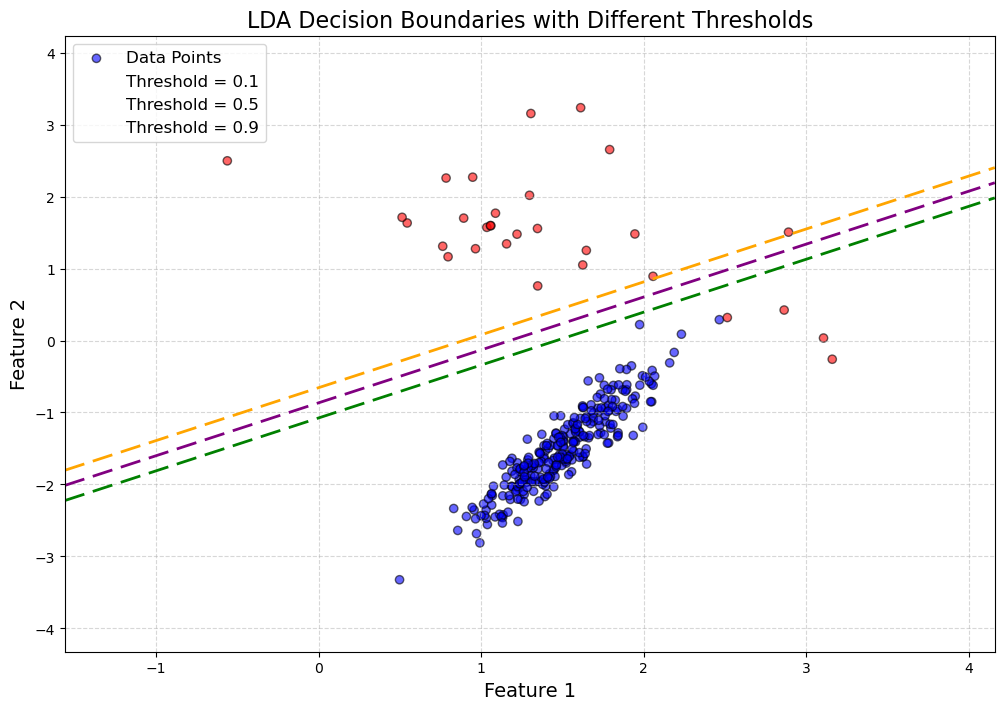

LDA Coefficients: [[-7.68683346 10.459423  ]]
LDA Intercept: [9.05092464]
Training Accuracy: 98.67%


In [13]:
################## LDA decision boundary with different thresholds

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Unbalanced Two-Dimensional Data
def generate_unbalanced_data(n_samples=300, weights=[0.9, 0.1], class_sep=1.0):
    """
    Generates an unbalanced two-dimensional dataset.
    
    Parameters:
    - n_samples: Total number of samples
    - weights: Proportion of each class (must sum to 1)
    - class_sep: Separation between classes
    
    Returns:
    - X: Feature matrix of shape (n_samples, 2)
    - y: Target vector of shape (n_samples,)
    """
    X, y = make_classification(n_samples=n_samples,
                               n_features=2,
                               n_redundant=0,
                               n_informative=2,
                               n_clusters_per_class=1,
                               weights=weights,
                               class_sep=class_sep,
                               random_state=42)
    return X, y

# Step 2: Train Linear Discriminant Analysis Model
def train_lda(X, y):
    """
    Trains a Linear Discriminant Analysis (LDA) model.
    
    Parameters:
    - X: Feature matrix of shape (n_samples, 2)
    - y: Target vector of shape (n_samples,)
    
    Returns:
    - lda: Trained LDA model
    """
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    return lda

# Step 3: Visualize Data and Decision Boundaries with Different Thresholds
def plot_lda_decision_boundary(X, y, lda, thresholds=[0.3, 0.5, 0.7]):
    """
    Plots the data points and LDA decision boundaries for different thresholds.
    
    Parameters:
    - X: Feature matrix of shape (n_samples, 2)
    - y: Target vector of shape (n_samples,)
    - lda: Trained LDA model
    - thresholds: List of threshold values to plot decision boundaries
    """
    plt.figure(figsize=(12, 8))
    
    # Scatter plot of the original data
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.6, label='Data Points')
    
    # Define the range for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a mesh grid to compute probabilities
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict probabilities using the LDA model
    probs = lda.predict_proba(grid)[:, 1].reshape(xx.shape)
    
    # Plot decision boundaries for different thresholds
    colors = ['green', 'purple', 'orange']
    for idx, threshold in enumerate(thresholds):
        CS = plt.contour(xx, yy, probs, levels=[threshold], colors=colors[idx], linestyles='--', linewidths=2)
        CS.collections[0].set_label(f'Threshold = {threshold}')
    
    # Configurations for the plot
    plt.title('LDA Decision Boundaries with Different Thresholds', fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Create a legend
    plt.legend(loc='upper left', fontsize=12)
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def main():
    # Generate unbalanced data
    X, y = generate_unbalanced_data(n_samples=300, weights=[0.9, 0.1], class_sep=1.5)
    
    # Train LDA model
    lda = train_lda(X, y)
    
    # Plot decision boundaries with different thresholds
    plot_lda_decision_boundary(X, y, lda, thresholds=[0.1, 0.5, 0.9])
    
    # Print model parameters
    print("LDA Coefficients:", lda.coef_)
    print("LDA Intercept:", lda.intercept_)
    
    # Predict on training data
    y_pred = lda.predict(X)
    accuracy = np.mean(y_pred == y)
    print(f"Training Accuracy: {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()

/var/folders/_j/cv87v3fd41g3gd1lbxjsrwc40000gn/T/ipykernel_96864/2273555699.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[0].set_label(f'Threshold = {threshold}')


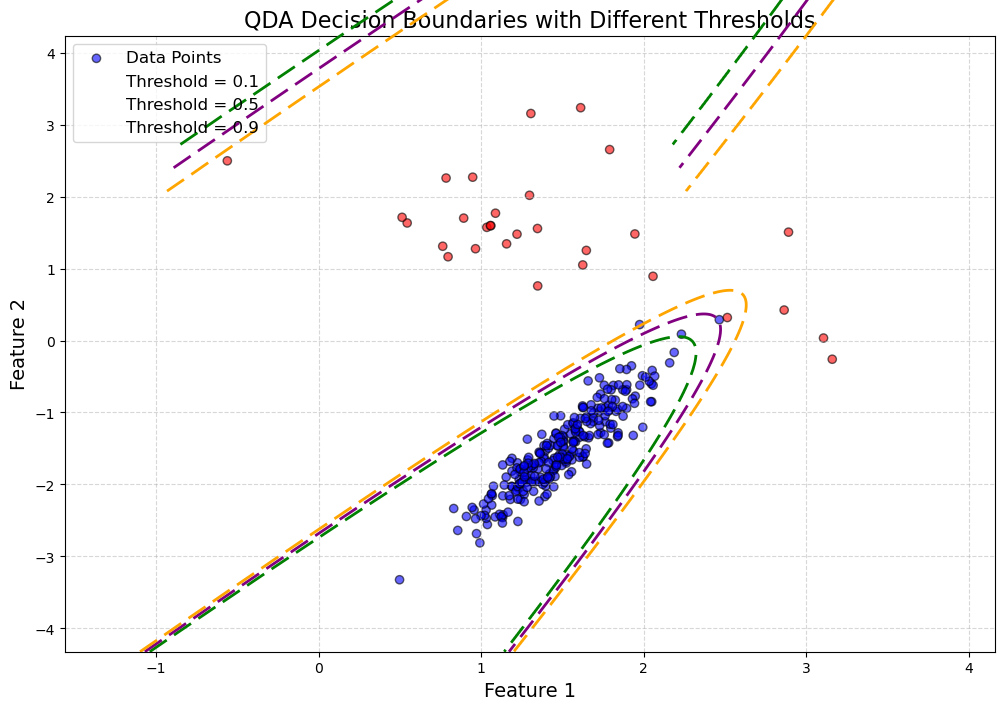

QDA Means:
 Class 0: [ 1.49358219 -1.51348905]
 Class 1: [1.42541456 1.50790017]
QDA Priors: [0.9 0.1]
Training Accuracy (Threshold=0.5): 99.33%
Training Accuracy (Threshold=0.3): 99.33%
Training Accuracy (Threshold=0.5): 99.33%
Training Accuracy (Threshold=0.7): 99.33%


In [17]:
################## QDA decision boundary with different thresholds

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Unbalanced Two-Dimensional Data
def generate_unbalanced_data(n_samples=300, weights=[0.9, 0.1], class_sep=1.0):
    """
    Generates an unbalanced two-dimensional dataset.
    
    Parameters:
    - n_samples: Total number of samples
    - weights: Proportion of each class (must sum to 1)
    - class_sep: Separation between classes
    
    Returns:
    - X: Feature matrix of shape (n_samples, 2)
    - y: Target vector of shape (n_samples,)
    """
    X, y = make_classification(n_samples=n_samples,
                               n_features=2,
                               n_redundant=0,
                               n_informative=2,
                               n_clusters_per_class=1,
                               weights=weights,
                               class_sep=class_sep,
                               random_state=42)
    return X, y

# Step 2: Train Quadratic Discriminant Analysis Model
def train_qda(X, y):
    """
    Trains a Quadratic Discriminant Analysis (QDA) model.
    
    Parameters:
    - X: Feature matrix of shape (n_samples, 2)
    - y: Target vector of shape (n_samples,)
    
    Returns:
    - qda: Trained QDA model
    """
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)
    return qda

# Step 3: Visualize Data and Decision Boundaries with Different Thresholds
def plot_qda_decision_boundary(X, y, qda, thresholds=[0.3, 0.5, 0.7]):
    """
    Plots the data points and QDA decision boundaries for different thresholds.
    
    Parameters:
    - X: Feature matrix of shape (n_samples, 2)
    - y: Target vector of shape (n_samples,)
    - qda: Trained QDA model
    - thresholds: List of threshold values to plot decision boundaries
    """
    plt.figure(figsize=(12, 8))
    
    # Scatter plot of the original data
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.6, label='Data Points')
    
    # Define the range for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a mesh grid to compute probabilities
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict probabilities using the QDA model
    probs = qda.predict_proba(grid)[:, 1].reshape(xx.shape)
    
    # Plot decision boundaries for different thresholds
    colors = ['green', 'purple', 'orange']
    for idx, threshold in enumerate(thresholds):
        CS = plt.contour(xx, yy, probs, levels=[threshold], colors=colors[idx], linestyles='--', linewidths=2)
        CS.collections[0].set_label(f'Threshold = {threshold}')
    
    # Configurations for the plot
    plt.title('QDA Decision Boundaries with Different Thresholds', fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Create a legend
    plt.legend(loc='upper left', fontsize=12)
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def main():
    # Generate unbalanced data
    X, y = generate_unbalanced_data(n_samples=300, weights=[0.9, 0.1], class_sep=1.5)
    
    # Train QDA model
    qda = train_qda(X, y)
    
    # Plot decision boundaries with different thresholds
    plot_qda_decision_boundary(X, y, qda, thresholds=[0.1, 0.5, 0.9])
    
    # Print model parameters
    print("QDA Means:")
    for idx, mean in enumerate(qda.means_):
        print(f" Class {idx}: {mean}")
    print("QDA Priors:", qda.priors_)
    
    # Predict on training data with default threshold (0.5)
    y_pred_default = qda.predict(X)
    accuracy_default = np.mean(y_pred_default == y)
    print(f"Training Accuracy (Threshold=0.5): {accuracy_default * 100:.2f}%")
    
    # Predict with different thresholds
    thresholds = [0.3, 0.5, 0.7]
    for threshold in thresholds:
        y_pred = (qda.predict_proba(X)[:, 1] >= threshold).astype(int)
        accuracy = np.mean(y_pred == y)
        print(f"Training Accuracy (Threshold={threshold}): {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()